In [6]:
import os
import matplotlib.pyplot as plt
from cmdstanpy import CmdStanModel

In [2]:
# Create a dataset (as a dictionary) of F+L binary samples with F zeros and L ones, 
# with F=number of letters in first name, L=number of letters in last name. 
# Dictionary needs to consist of N=F+L, and y = list of samples.

values = [0 for _ in range(len("Mateusz"))] + [1 for _ in range(len("Pilecki"))]

data = {
    "N" : len(values),
    "y" : values
}

In [3]:
# Create a cmdstanpy model from bern_1.stan code provided.
bernoulli_stan = os.path.join(".", "bern_1.stan")
bernoulli_model = CmdStanModel(stan_file=bernoulli_stan)
bernoulli_model.name
bernoulli_model.stan_file
bernoulli_model.exe_file
bernoulli_model.code()

INFO:cmdstanpy:compiling stan file E:\uczelnia\ISZ\semestr1\data_analytics\bern_1.stan to exe file E:\uczelnia\ISZ\semestr1\data_analytics\bern_1.exe
INFO:cmdstanpy:compiled model executable: E:\uczelnia\ISZ\semestr1\data_analytics\bern_1.exe
--- Translating Stan model to C++ code ---
bin/stanc.exe  --o=E:/uczelnia/ISZ/semestr1/data_analytics/bern_1.hpp E:/uczelnia/ISZ/semestr1/data_analytics/bern_1.stan
Warning in 'E:/uczelnia/ISZ/semestr1/data_analytics/bern_1.stan', line 3, column 3: Declaration
    of arrays by placing brackets after a variable name is deprecated and
    will be removed in Stan 2.32.0. Instead use the array keyword before the
    type. This can be changed automatically using the auto-format flag to
    stanc

--- Compiling, linking C++ code ---
g++ -std=c++1y -m64 -D_REENTRANT -Wall -Wno-unused-function -Wno-uninitialized -Wno-unused-but-set-variable -Wno-unused-variable -Wno-sign-compare -Wno-unused-local-typedefs -Wno-int-in-bool-context -Wno-attributes -Wno-igno

'data {\n   int<lower=0> N;\n   int<lower=0,upper=1> y[N];\n }\n parameters {\n   real<lower=0,upper=1> theta;\n }\n model {\n   theta ~ beta(1,1);  // uniform prior on interval 0,1\n   y ~ bernoulli(theta);\n }'

In [4]:
# Sample from the model using the dataset and .sample() method
bern_fit = bernoulli_model.sample(data=data, output_dir='.')
print(bern_fit)
bern_fit.draws().shape

INFO:cmdstanpy:CmdStan start processing
chain 1 |          | 00:00 Status




chain 1 |▍         | 00:00 Status
chain 1 |██████████| 00:00 Sampling completed
chain 2 |██████████| 00:00 Sampling completed
chain 3 |██████████| 00:00 Sampling completed
chain 4 |██████████| 00:00 Sampling completed


INFO:cmdstanpy:CmdStan done processing.



CmdStanMCMC: model=bern_1 chains=4['method=sample', 'algorithm=hmc', 'adapt', 'engaged=1']
 csv_files:
	E:\uczelnia\ISZ\semestr1\data_analytics\bern_1-20220305145200_1.csv
	E:\uczelnia\ISZ\semestr1\data_analytics\bern_1-20220305145200_2.csv
	E:\uczelnia\ISZ\semestr1\data_analytics\bern_1-20220305145200_3.csv
	E:\uczelnia\ISZ\semestr1\data_analytics\bern_1-20220305145200_4.csv
 output_files:
	E:\uczelnia\ISZ\semestr1\data_analytics\bern_1-20220305145200_0-stdout.txt
	E:\uczelnia\ISZ\semestr1\data_analytics\bern_1-20220305145200_1-stdout.txt
	E:\uczelnia\ISZ\semestr1\data_analytics\bern_1-20220305145200_2-stdout.txt
	E:\uczelnia\ISZ\semestr1\data_analytics\bern_1-20220305145200_3-stdout.txt


(1000, 4, 8)

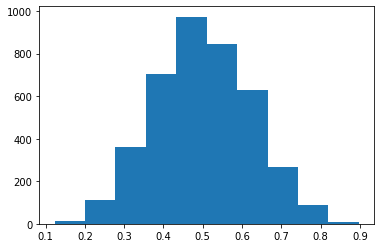

In [8]:
# Extract theta variable and create its histogram.
theta = bern_fit.stan_variable('theta')
plt.hist(theta);

In [13]:
# Using .summary() method get mean, median and 5% and 95% quantiles of theta, and mark them on the histogram.
summary = bern_fit.summary()
summary

,Mean,MCSE,StdDev,5%,50%,95%,N_Eff,N_Eff/s,R_hat
name,,,,,,,,,
lp__,-12.0,0.0180,0.72,-13.0,-11.0,-11.0,1600.0,7600.0,1.0
theta,0.5,0.0031,0.12,0.3,0.5,0.7,1500.0,6900.0,1.0


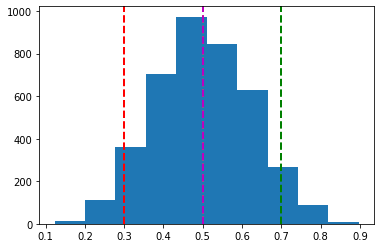

In [35]:
values = ["Mean", "50%", "5%", "95%"]
colours = ["y", "m", "r", "g"]

for value, colour in zip(values, colours):
    theta_val = summary[value]["theta"]
    plt.axvline(theta_val, color=colour, linestyle='dashed', linewidth=2, label="label")

plt.hist(theta)
plt.show()